## House Price Regression Project

In [169]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 - Data Ingestion

In [170]:
import pandas as pd
df = pd.read_csv("training_set.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Target Feature - Sales Price
### Step 2 - Perform basic data quality checks

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [172]:
m = df.isna().sum()
m[m>0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

### Based on above number of missing values use constant strategy for Categorical features

In [173]:
df.duplicated().sum()

np.int64(0)

### Step 3 - Seprate X and Y(SalePrice)
### id is just some serial number, statisctically isignificant

In [174]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [175]:
X = df.drop(columns = ["Id", "SalePrice"])
Y = df[["SalePrice"]]

In [176]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [177]:
Y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


<Axes: xlabel='SalePrice', ylabel='Count'>

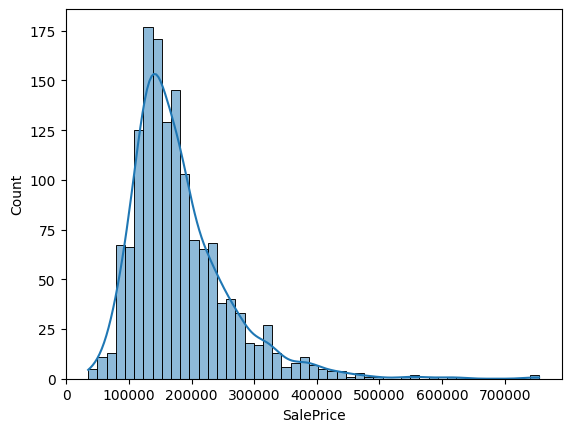

In [178]:
import seaborn as sns
sns.histplot(data = df, x = "SalePrice", kde = True)

### Step 4 - Preprocessing for Feature Selection
cat - OrdinalEncoding

In [179]:
X.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 79, dtype: object

In [180]:
cat = list(X.columns[X.dtypes == "object"])
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [181]:
con = list(X.columns[X.dtypes != "object"])
con

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [182]:
from sklearn.pipeline import make_pipeline # To perform multiple operations in one go
from sklearn.impute import SimpleImputer # To replace missing values
from sklearn.preprocessing import StandardScaler, OrdinalEncoder # Converting all data in numerical format
from sklearn.compose import ColumnTransformer # Combinig numerical and categorical pipeline

In [183]:
num_pipe1 = make_pipeline(
    SimpleImputer(strategy = "median"),
    StandardScaler()
)

In [184]:
cat_pipe1 = make_pipeline(
    SimpleImputer(strategy = "constant", fill_value = "Not_Avail"),
    OrdinalEncoder()
)

In [185]:
pre1 = ColumnTransformer(
    [
        ("num", num_pipe1, con),
        ("cat", cat_pipe1, cat)
    ]
).set_output(transform="pandas")

In [186]:
X_pre = pre1.fit_transform(X)
X_pre.head()

,num__MSSubClass,num__LotFrontage,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,...,cat__GarageType,cat__GarageFinish,cat__GarageQual,cat__GarageCond,cat__PavedDrive,cat__PoolQC,cat__Fence,cat__MiscFeature,cat__SaleType,cat__SaleCondition
0,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
1,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
2,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
3,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,0.0
4,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0


In [187]:
pre1

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['MSSubClass', 'LotFrontage', 'LotArea',
                                  'OverallQual', 'OverallCond', 'YearBuilt',
                                  'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                                  'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                                  'GrLivArea'...
                                 ['MSZoning', 'Street', 'Alley', 'LotShape',
                                  'LandContour', 'Utilities', 'LotConfig',
                                  'LandSlope', 'Neighborhood', 'Condition1',
                                  'Condition2', 'BldgType', 'HouseStyle',
                                  'RoofStyle', 'RoofMatl', 'Exterior1st',
                                  'Exterior2nd', 'MasVnrType', 'ExterQual',
                                  'ExterCond', 'Foundation', 'BsmtQual',
                                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'Heating', 'HeatingQC',
                                  'CentralAir', 'Electrical', ...])])

### Apply Feature selection

In [188]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

In [189]:
model = LinearRegression()
sel = SequentialFeatureSelector(model, n_features_to_select = "auto", direction = "backward", n_jobs = -1)
sel.fit(X_pre, Y)
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__MSSubClass', 'num__LotArea', 'num__OverallQual',
       'num__OverallCond', 'num__YearBuilt', 'num__MasVnrArea',
       'num__BsmtFinSF1', 'num__BsmtFinSF2', 'num__BsmtUnfSF',
       'num__TotalBsmtSF', 'num__1stFlrSF', 'num__2ndFlrSF',
       'num__LowQualFinSF', 'num__GrLivArea', 'num__BsmtFullBath',
       'num__Fireplaces', 'num__GarageCars', 'num__WoodDeckSF',
       'num__ScreenPorch', 'num__PoolArea', 'num__YrSold',
       'cat__LandContour', 'cat__Utilities', 'cat__Neighborhood',
       'cat__BldgType', 'cat__HouseStyle', 'cat__RoofMatl',
       'cat__Exterior1st', 'cat__MasVnrType', 'cat__ExterQual',
       'cat__BsmtQual', 'cat__BsmtCond', 'cat__BsmtExposure',
       'cat__HeatingQC', 'cat__KitchenQual', 'cat__Functional',
       'cat__FireplaceQu', 'cat__GarageFinish', 'cat__GarageCond',
       'cat__MiscFeature'], dtype=object)

In [190]:
len(sel_cols)

40

In [191]:
sel_cols[0]

'num__MSSubClass'

In [192]:
sel_cols[0].split("__")

['num', 'MSSubClass']

In [193]:
sel_cols[0].split("__")[1]

'MSSubClass'

In [194]:
imp_cols = [col.split("__")[1] for col in sel_cols]
imp_cols

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'ScreenPorch',
 'PoolArea',
 'YrSold',
 'LandContour',
 'Utilities',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofMatl',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageFinish',
 'GarageCond',
 'MiscFeature']

In [195]:
X_sel = X[imp_cols]
X_sel

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageCond,MiscFeature
0,60,8450,7,5,2003,196.0,706,0,150,856,...,Gd,TA,No,Ex,Gd,Typ,NaN,RFn,TA,NaN
1,20,9600,6,8,1976,0.0,978,0,284,1262,...,Gd,TA,Gd,Ex,TA,Typ,TA,RFn,TA,NaN
2,60,11250,7,5,2001,162.0,486,0,434,920,...,Gd,TA,Mn,Ex,Gd,Typ,TA,RFn,TA,NaN
3,70,9550,7,5,1915,0.0,216,0,540,756,...,TA,Gd,No,Gd,Gd,Typ,Gd,Unf,TA,NaN
4,60,14260,8,5,2000,350.0,655,0,490,1145,...,Gd,TA,Av,Ex,Gd,Typ,TA,RFn,TA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,0.0,0,0,953,953,...,Gd,TA,No,Ex,TA,Typ,TA,RFn,TA,NaN
1456,20,13175,6,6,1978,119.0,790,163,589,1542,...,Gd,TA,No,TA,TA,Min1,TA,Unf,TA,NaN
1457,70,9042,7,9,1941,0.0,275,0,877,1152,...,TA,Gd,No,Ex,Gd,Typ,Gd,RFn,TA,Shed
1458,20,9717,5,6,1950,0.0,49,1029,0,1078,...,TA,TA,Mn,Gd,Gd,Typ,NaN,Unf,TA,NaN


### Feature Selection is Complete
### Step 5 - Create a Final Preprocessing Pipline for X_sel
cat - OneHotEncoding

In [196]:
cat_sel = list(X_sel.columns[X_sel.dtypes == "object"])
con_sel = list(X_sel.columns[X_sel.dtypes != "object"])

In [197]:
cat_sel

['LandContour',
 'Utilities',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofMatl',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageFinish',
 'GarageCond',
 'MiscFeature']

In [198]:
con_sel

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'ScreenPorch',
 'PoolArea',
 'YrSold']

In [199]:
from sklearn.preprocessing import OneHotEncoder

In [200]:
num_pipe2 = make_pipeline(
    SimpleImputer(strategy = "median"),
    StandardScaler()
)

In [201]:
cat_pipe2 = make_pipeline(
    SimpleImputer(strategy = "constant", fill_value = "Not_Avail"),
    OneHotEncoder(handle_unknown = "ignore", sparse_output = False)
)

In [202]:
pre2 = ColumnTransformer(
    [
        ("num", num_pipe2, con_sel),
        ("cat", cat_pipe2, cat_sel)
    ]
).set_output(transform = "pandas")

In [203]:
X_sel_pre = pre2.fit_transform(X_sel)
X_sel_pre

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,num__BsmtUnfSF,num__TotalBsmtSF,...,cat__GarageCond_Fa,cat__GarageCond_Gd,cat__GarageCond_Not_Avail,cat__GarageCond_Po,cat__GarageCond_TA,cat__MiscFeature_Gar2,cat__MiscFeature_Not_Avail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC
0,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.514104,0.575425,-0.288653,-0.944591,-0.459303,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.570750,1.171992,-0.288653,-0.641228,0.466465,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.073375,0.073480,0.651479,-0.517200,0.984752,0.325915,0.092907,-0.288653,-0.301643,-0.313369,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.073375,0.375148,1.374795,-0.517200,0.951632,1.366489,0.463568,-0.288653,-0.174865,0.199680,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.260560,-0.071836,-0.517200,0.918511,-0.570750,-0.973018,-0.288653,0.873321,-0.238122,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1456,-0.872563,0.266407,-0.071836,0.381743,0.222975,0.087911,0.759659,0.722112,0.049262,1.104925,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1457,0.309859,-0.147810,0.651479,3.078570,-1.002492,-0.570750,-0.369871,-0.288653,0.701265,0.215641,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1458,-0.872563,-0.080160,-0.795151,0.381743,-0.704406,-0.570750,-0.865548,6.092188,-1.284176,0.046905,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


### Step 6 - Train test split

In [204]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_sel_pre, Y, test_size = 0.2, random_state = 21)

In [205]:
xtrain.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,num__BsmtUnfSF,num__TotalBsmtSF,...,cat__GarageCond_Fa,cat__GarageCond_Gd,cat__GarageCond_Not_Avail,cat__GarageCond_Po,cat__GarageCond_TA,cat__MiscFeature_Gar2,cat__MiscFeature_Not_Avail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC
710,-0.636078,-0.640101,-2.241782,0.381743,-1.201217,-0.570750,-0.973018,-0.288653,-0.672923,-1.795509,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1098,-0.163109,-0.452686,-1.518467,0.381743,-1.168096,-0.570750,0.500854,-0.288653,-1.284176,-0.878862,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1286,-0.872563,-0.072844,-0.071836,-0.517200,-0.273836,1.925521,0.274948,0.213629,0.250749,0.616959,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
992,0.073375,-0.075851,-0.071836,2.179628,-0.240715,1.311140,0.202570,0.436865,-0.901577,-0.536830,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
631,1.492282,-0.593999,1.374795,-0.517200,1.150356,0.027027,-0.920380,-0.288653,2.179592,1.132288,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [206]:
ytrain.head()

,SalePrice
710,52000
1098,128000
1286,143000
992,187000
631,209500


In [207]:
xtest.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,num__BsmtUnfSF,num__TotalBsmtSF,...,cat__GarageCond_Fa,cat__GarageCond_Gd,cat__GarageCond_Not_Avail,cat__GarageCond_Po,cat__GarageCond_TA,cat__MiscFeature_Gar2,cat__MiscFeature_Not_Avail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC
880,-0.872563,-0.350058,-0.795151,-0.517200,1.117235,-0.570750,1.176379,-0.288653,-1.035147,0.074268,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
605,0.073375,0.309002,0.651479,0.381743,-0.207594,0.403405,0.022723,-0.288653,-0.573311,-0.659961,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1166,-0.872563,-0.004192,1.374795,-0.517200,1.216598,-0.172232,-0.973018,-0.288653,2.550871,1.451518,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
216,-0.872563,-0.207142,0.651479,-0.517200,1.084115,0.901552,1.101808,-0.288653,-0.174865,0.863222,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
970,-0.163109,0.028380,-1.518467,-1.416142,-0.737526,-0.570750,-0.973018,-0.288653,0.345832,-0.769412,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [208]:
ytest.head()

,SalePrice
880,157000
605,205000
1166,245350
216,210000
970,135000


In [209]:
xtrain.shape

(1168, 148)

In [210]:
xtest.shape

(292, 148)

### Step 7 - Build multiple models
LinearRegression, Ridge, Lasso

In [211]:
model1 = LinearRegression()

model1.fit(xtrain, ytrain)

LinearRegression()

In [212]:
model1.score(xtrain, ytrain)

0.9254855117253302

In [213]:
model1.score(xtest, ytest)

0.8188575163189917

### LinearRegression model is overfitting here
### A. Ridge

In [214]:
import numpy as np
params1 = {
    "alpha":np.arange(start = 0.1, stop = 50, step = 0.1)
}
params1

{'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
         1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
         2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
         3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
         4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
         5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
         6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
         7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
         8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
        10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
        11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
        12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
        13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
        14.4, 14.5, 14.6, 14.

In [215]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [216]:
base_ridge = Ridge()

gscv_ridge = GridSearchCV(base_ridge, param_grid = params1, cv = 5, scoring = "r2", n_jobs = -1)

gscv_ridge.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,...
       43. , 43.1, 43.2, 43.3, 43.4, 43.5, 43.6, 43.7, 43.8, 43.9, 44. ,
       44.1, 44.2, 44.3, 44.4, 44.5, 44.6, 44.7, 44.8, 44.9, 45. , 45.1,
       45.2, 45.3, 45.4, 45.5, 45.6, 45.7, 45.8, 45.9, 46. , 46.1, 46.2,
       46.3, 46.4, 46.5, 46.6, 46.7, 46.8, 46.9, 47. , 47.1, 47.2, 47.3,
       47.4, 47.5, 47.6, 47.7, 47.8, 47.9, 48. , 48.1, 48.2, 48.3, 48.4,
       48.5, 48.6, 48.7, 48.8, 48.9, 49. , 49.1, 49.2, 49.3, 49.4, 49.5,
       49.6, 49.7, 49.8, 49.9])},
             scoring='r2')

In [217]:
gscv_ridge.best_params_

{'alpha': np.float64(19.700000000000003)}

In [218]:
gscv_ridge.best_score_

np.float64(0.8336571782036316)

In [219]:
best_ridge = gscv_ridge.best_estimator_
best_ridge

Ridge(alpha=np.float64(19.700000000000003))

In [220]:
best_ridge.score(xtrain, ytrain)

0.8848549043635128

In [221]:
best_ridge.score(xtest, ytest)

0.8323321825572619

### B. Lasso

In [222]:
params2 = {
    "alpha":np.arange(start = 10, stop = 300, step = 10)
}
params2

{'alpha': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
        140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
        270, 280, 290])}

In [223]:
from sklearn.linear_model import Lasso

In [224]:
base_lasso = Lasso()

gscv_lasso = GridSearchCV(base_lasso, param_grid = params2, cv = 5, scoring = "r2", n_jobs = -1)

gscv_lasso.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290])},
             scoring='r2')

In [225]:
gscv_lasso.best_params_

{'alpha': np.int64(110)}

In [226]:
gscv_lasso.best_score_

np.float64(0.8462716732720365)

In [227]:
best_lasso = gscv_lasso.best_estimator_

In [228]:
best_lasso

Lasso(alpha=np.int64(110))

In [229]:
best_lasso.score(xtrain, ytrain)

0.9154625208907539

In [230]:
best_lasso.score(xtest, ytest)

0.8260038680806558

### Step 7 - Evaluate all models

In [231]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

In [232]:
def evaluate_model(model, x, y):
    ypred = model.predict(x)
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [233]:
print("Linear Regresion Test results:")
evaluate_model(model1, xtest, ytest)

Linear Regresion Test results:
RMSE : 35037.97
MAE : 17243.58
MAPE : 10.18%
R2 : 81.89%


In [234]:
print("Ridge Results:")
evaluate_model(best_ridge, xtest, ytest)

Ridge Results:
RMSE : 33709.60
MAE : 17626.54
MAPE : 10.07%
R2 : 83.23%


In [235]:
print("Lasso Model test results:")
evaluate_model(best_lasso, xtest, ytest)

Lasso Model test results:
RMSE : 34339.86
MAE : 16969.48
MAPE : 9.79%
R2 : 82.60%


### Ridge model has best r2 score in test of 81.14%
### Step 9 - Out of sample prediction

In [236]:
xnew = pd.read_csv("sample_set.csv")
xnew.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [237]:
xnew.shape

(1459, 80)

In [238]:
pre2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['MSSubClass', 'LotArea', 'OverallQual',
                                  'OverallCond', 'YearBuilt', 'MasVnrArea',
                                  'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                                  'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                                  'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
                                  'Fireplaces',...
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['LandContour', 'Utilities', 'Neighborhood',
                                  'BldgType', 'HouseStyle', 'RoofMatl',
                                  'Exterior1st', 'MasVnrType', 'ExterQual',
                                  'BsmtQual', 'BsmtCond', 'BsmtExposure',
                                  'HeatingQC', 'KitchenQual', 'Functional',
                                  'FireplaceQu', 'GarageFinish', 'GarageCond',
                                  'MiscFeature'])])

In [239]:
xnew_pre = pre2.transform(xnew)
xnew_pre.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,num__BsmtUnfSF,num__TotalBsmtSF,...,cat__GarageCond_Fa,cat__GarageCond_Gd,cat__GarageCond_Not_Avail,cat__GarageCond_Po,cat__GarageCond_TA,cat__MiscFeature_Gar2,cat__MiscFeature_Not_Avail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC
0,-0.872563,0.110763,-0.795151,0.381743,-0.340077,-0.570750,0.053428,0.604293,-0.672923,-0.400017,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,-0.872563,0.375850,-0.071836,0.381743,-0.439440,0.027027,1.051363,-0.288653,-0.365032,0.619239,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.073375,0.332053,-0.795151,-0.517200,0.852269,-0.570750,0.761852,-0.288653,-0.974021,-0.295127,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.073375,-0.054002,-0.071836,0.381743,0.885390,-0.460051,0.347326,-0.288653,-0.550672,-0.299687,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.492282,-0.552407,1.374795,-0.517200,0.686666,-0.570750,-0.396190,-0.288653,1.018211,0.507509,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [240]:
preds = best_ridge.predict(xnew_pre)
preds[0:5]

array([119098.05936626, 146306.29434139, 170252.06759716, 181816.63471935,
       194355.9872906 ])

In [241]:
res = xnew[["Id"]]
res

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [242]:
res["SalePrice_pred"] = preds

In [243]:
res = res.round(2)
res

,Id,SalePrice_pred
0,1461,119098.06
1,1462,146306.29
2,1463,170252.07
3,1464,181816.63
4,1465,194355.99
...,...,...
1454,2915,81504.78
1455,2916,77105.56
1456,2917,176502.49
1457,2918,103136.19


<Axes: xlabel='SalePrice_pred', ylabel='Count'>

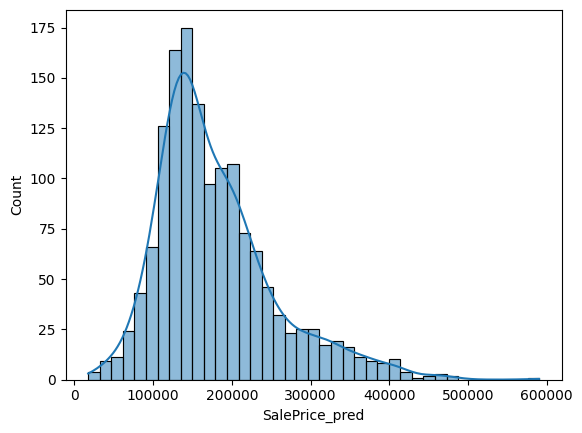

In [244]:
sns.histplot(data = res, x = "SalePrice_pred", kde = True)

In [245]:
res.to_csv("RidgeResults.csv", index = False)

### How to save the model object

In [246]:
pre2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['MSSubClass', 'LotArea', 'OverallQual',
                                  'OverallCond', 'YearBuilt', 'MasVnrArea',
                                  'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                                  'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                                  'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
                                  'Fireplaces',...
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['LandContour', 'Utilities', 'Neighborhood',
                                  'BldgType', 'HouseStyle', 'RoofMatl',
                                  'Exterior1st', 'MasVnrType', 'ExterQual',
                                  'BsmtQual', 'BsmtCond', 'BsmtExposure',
                                  'HeatingQC', 'KitchenQual', 'Functional',
                                  'FireplaceQu', 'GarageFinish', 'GarageCond',
                                  'MiscFeature'])])

In [247]:
best_ridge

Ridge(alpha=np.float64(19.700000000000003))

### Save the model and preprocessor

In [248]:
%pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [249]:
import joblib

joblib.dump(pre2, "pre.joblib")

['pre.joblib']

In [250]:
joblib.dump(best_ridge, "ridge.joblib")

['ridge.joblib']

### Load the pre and model

In [251]:
p = joblib.load("pre.joblib")

p

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['MSSubClass', 'LotArea', 'OverallQual',
                                  'OverallCond', 'YearBuilt', 'MasVnrArea',
                                  'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                                  'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                                  'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
                                  'Fireplaces',...
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['LandContour', 'Utilities', 'Neighborhood',
                                  'BldgType', 'HouseStyle', 'RoofMatl',
                                  'Exterior1st', 'MasVnrType', 'ExterQual',
                                  'BsmtQual', 'BsmtCond', 'BsmtExposure',
                                  'HeatingQC', 'KitchenQual', 'Functional',
                                  'FireplaceQu', 'GarageFinish', 'GarageCond',
                                  'MiscFeature'])])

In [252]:
m = joblib.load("ridge.joblib")

m

Ridge(alpha=np.float64(19.700000000000003))